# **Zomato**
# Restaurants Analytics Project
### Comprehensive Analysis: *Popularity, Cuisine Trends, Price vs Rating and Service Modes*
# ===============================================


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1️⃣ Data Preprocessing

### 1. Data Overview

In [13]:
df = pd.read_csv("india_all_restaurants_details.csv", engine="python", on_bad_lines="skip")
print(df.shape)

(224520, 18)


In [14]:
df.head()

,Unnamed: 0,sno,zomato_url,name,city,area,rating,rating_count,telephone,cusine,cost_for_two,address,coordinates,timings,online_order,table_reservation,delivery_only,famous_food
0,0,0,https://www.zomato.com/ncr/sainik-food-pandav-...,Sainik Food,Delhi NCR,Pandav Nagar,3.2,21,011 22486474 +91 9717806814,North Indian,300,"C 4/1, Opposite Mother Dairy, Pandav Nagar, Ne...","28.6177324058,77.2848711535","{'Mon': '1pm – 4pm, 7pm – 10:30pm', 'Tue': '1p...",False,False,False,NaN
1,1,1,https://www.zomato.com/mumbai/kunals-creamery-...,Kunal's Creamery & Eatery,Mumbai,Ambernath,3.6,51,+91 9561356690 +91 9637537499,"Street Food, Chinese, Fast Food",500,"Shop 14, Trishul Shivdham Complex, Shiv Mandir...","19.2058869331,73.1842865422","{'Mon': '10am – 12midnight', 'Tue': '10am – 12...",False,False,False,Penne Pasta
2,2,2,https://www.zomato.com/ncr/brij-palace-restaur...,Brij Palace Restaurant,Delhi NCR,Jasola,0,0,+91 9891828106,North Indian,250,"4, Okhla Bus Stand, Jamia Nagar, Near, Jasola,...","28.5630343606,77.2912229598","{'Mon': '12noon – 4pm, 7pm – 12midnight', 'Tue...",False,False,False,"Chana Masala , Butter Naan , Paneer Bhujia , D..."
3,3,3,https://www.zomato.com/ncr/sahib-hotel-paharga...,Sahib Hotel,Delhi NCR,Paharganj,0,0,+91 9670005455,North Indian,300,"121, Amrit Kaur Market, Opposite New Delhi Rai...","28.6424106380,77.2182980552","{'Mon': '6am – 11:30pm, 12midnight – 1am', 'Tu...",False,False,False,NaN
4,4,4,https://www.zomato.com/kolkata/chunkys-shibpur...,Chunky's,Kolkata,Shibpur,3.0,78,+91 8442828284,"Italian, Pizza, Continental",500,"523, G.T Road, Howrah., Shibpur, Howrah","22.5777582163,88.3307084441","{'Mon': '12noon – 3am', 'Tue': '12noon – 3am',...",True,False,False,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224520 entries, 0 to 224519
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         224520 non-null  int64 
 1   sno                224520 non-null  int64 
 2   zomato_url         224520 non-null  object
 3   name               224520 non-null  object
 4   city               224520 non-null  object
 5   area               224520 non-null  object
 6   rating             224520 non-null  object
 7   rating_count       224520 non-null  int64 
 8   telephone          224520 non-null  object
 9   cusine             224520 non-null  object
 10  cost_for_two       224520 non-null  object
 11  address            222734 non-null  object
 12  coordinates        224520 non-null  object
 13  timings            221556 non-null  object
 14  online_order       224520 non-null  bool  
 15  table_reservation  224520 non-null  bool  
 16  delivery_only      2

### 2. Typecasting

In [16]:
df['rating'] = pd.to_numeric(df['rating'], errors ='coerce')
df['cost_for_two'] = pd.to_numeric(df['cost_for_two'], errors='coerce')

### 3. Removing Duplicates and Unnecessary columns

In [17]:
df.drop(columns=["Unnamed: 0", "sno", "zomato_url", "telephone", "address", "coordinates", "timings"], axis=1, inplace=True)

In [18]:
print("Duplicates Before : ",df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates After : ",df.duplicated().sum())

Duplicates Before :  1162
Duplicates After :  0


### 4. Handling null Values

In [19]:
df.isna().sum()

,0
name,0
city,0
area,0
rating,27573
rating_count,0
cusine,0
cost_for_two,10004
online_order,0
table_reservation,0
delivery_only,0


In [20]:
df.describe()

,rating,rating_count,cost_for_two
count,195785.000000,223358.000000,213354.00000
mean,2.574916,95.988207,366.30320
std,1.575456,346.791361,231.61111
min,0.000000,0.000000,0.00000
25%,0.000000,0.000000,200.00000
50%,3.300000,11.000000,300.00000
75%,3.700000,59.000000,500.00000
max,4.900000,42621.000000,12000.00000


In [21]:
df.drop("famous_food",inplace=True, axis=1)

In [22]:
# Fill missing with median
df['rating'] = df['rating'].fillna(df['rating'].median())

In [23]:
# Replace 0 with NaN
df['cost_for_two'] = df['cost_for_two'].replace(0, np.nan)

# Fill missing with median
df['cost_for_two'] = df['cost_for_two'].fillna(df['cost_for_two'].median())


### 5. FINAL DATA AFTER PREPROCESSING

In [24]:
df.head()

,name,city,area,rating,rating_count,cusine,cost_for_two,online_order,table_reservation,delivery_only
0,Sainik Food,Delhi NCR,Pandav Nagar,3.2,21,North Indian,300.0,False,False,False
1,Kunal's Creamery & Eatery,Mumbai,Ambernath,3.6,51,"Street Food, Chinese, Fast Food",500.0,False,False,False
2,Brij Palace Restaurant,Delhi NCR,Jasola,0.0,0,North Indian,250.0,False,False,False
3,Sahib Hotel,Delhi NCR,Paharganj,0.0,0,North Indian,300.0,False,False,False
4,Chunky's,Kolkata,Shibpur,3.0,78,"Italian, Pizza, Continental",500.0,True,False,False


## 2️⃣ Restaurant Popularity Analysis


### 1. Top rated Restaurant in descending order of their rating count

In [25]:
# Top rated Restaurant in descending order of their rating count
top_rated_df = df[df['rating'] == max(df['rating'])].sort_values(by='rating_count', ascending=False)
top = top_rated_df.iloc[0]
print("Most Rated Restaurant based on customer reviews : ", top['name'])
print("Rating : ",top['rating'])
print("Rating count : ", top['rating_count'])
print("City : ", top['city'])

Most Rated Restaurant based on customer reviews :  Byg Brewski Brewing Company
Rating :  4.9
Rating count :  19305
City :  Bengaluru


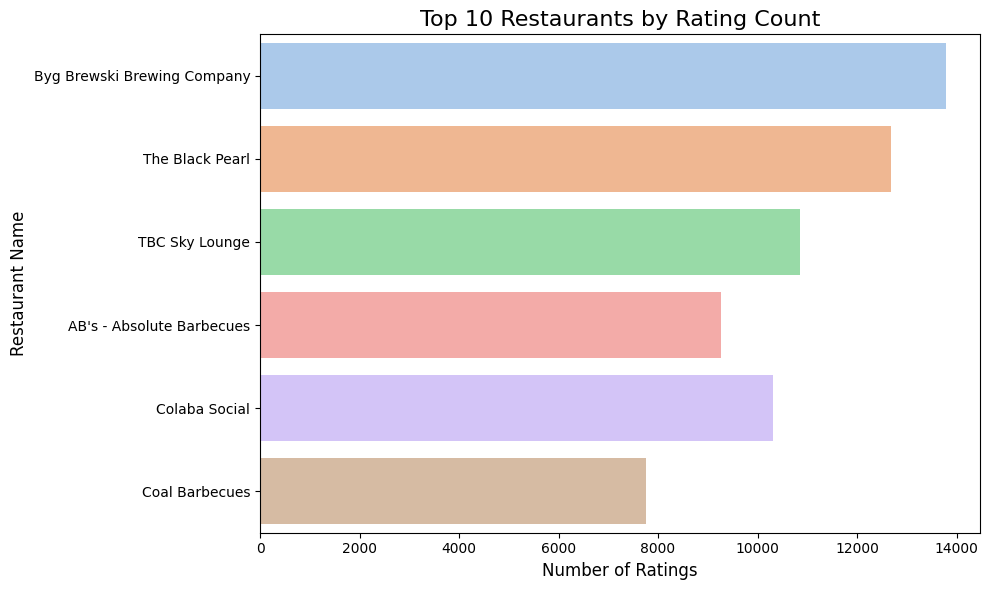

In [26]:
# Top 10 Restaurants and their rating count
top10 = top_rated_df.head(10)
plt.figure(figsize=(10,6))
sns.barplot(data= top10, x='rating_count', y='name', palette='pastel', errorbar=None, hue='name')
plt.title('Top 10 Restaurants by Rating Count', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)
plt.tight_layout()
plt.show()

### 2. Top 10 cities with the highest number of restaurants listed on Zomato.

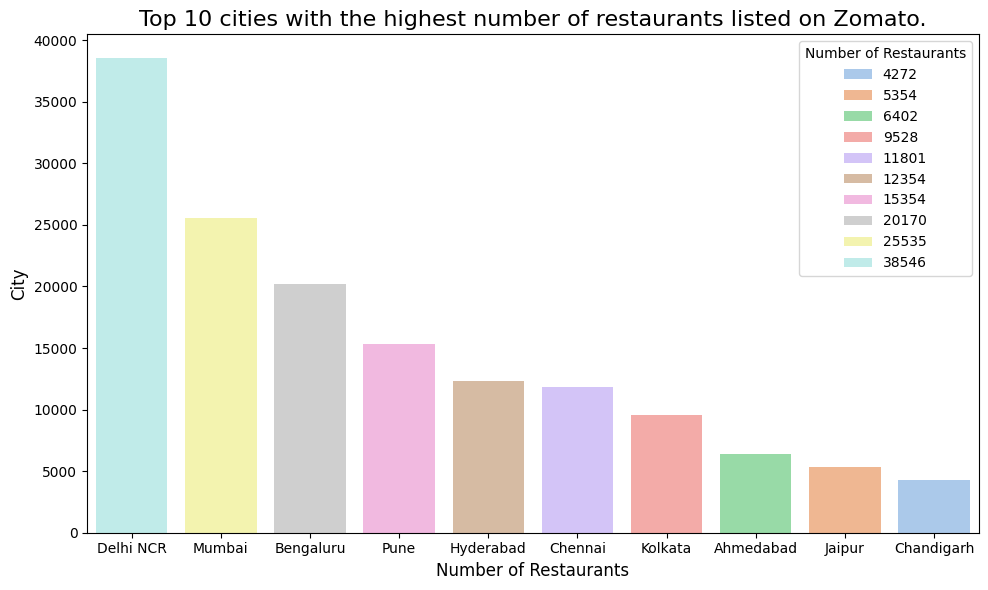

In [27]:
city = df['city'].value_counts()[:10]

plt.figure(figsize=(10,6))
sns.barplot(x=city.index, y=city, palette='pastel', hue=city)
plt.title('Top 10 cities with the highest number of restaurants listed on Zomato.', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.legend(title="Number of Restaurants")
plt.tight_layout()
plt.show()

### 3. Top Brands listed with Zomato

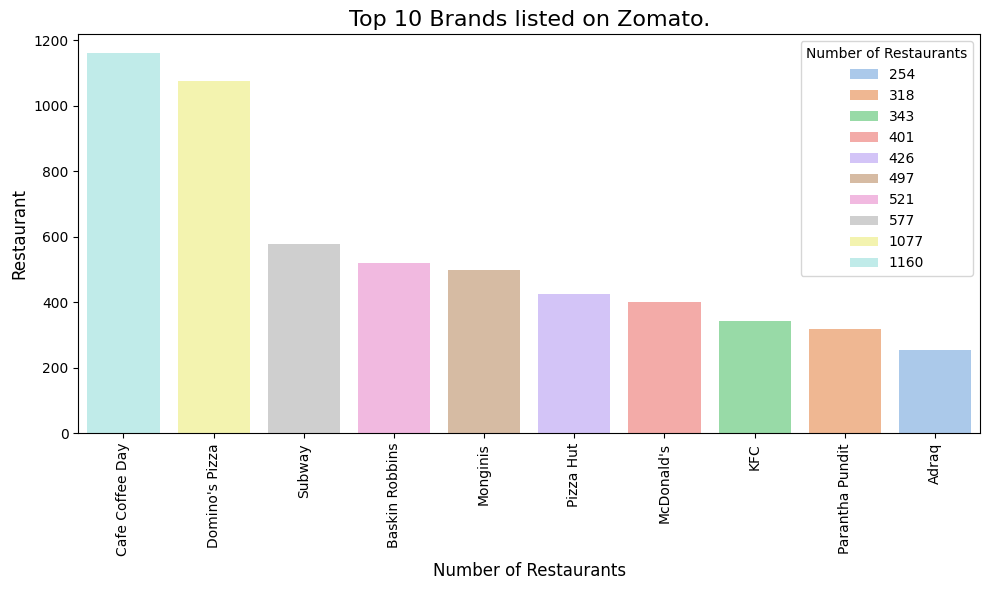

In [28]:
brand = df['name'].value_counts()[:10]

plt.figure(figsize=(10,6))
sns.barplot(x=brand.index, y=brand, palette='pastel', hue=brand)
plt.title('Top 10 Brands listed on Zomato.', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Restaurant', fontsize=12)
plt.legend(title="Number of Restaurants")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 3️⃣ Cuisine Trends Across Cities

In [29]:
cusine_df = df[['city', 'cusine']]
cusine_df.head()

,city,cusine
0,Delhi NCR,North Indian
1,Mumbai,"Street Food, Chinese, Fast Food"
2,Delhi NCR,North Indian
3,Delhi NCR,North Indian
4,Kolkata,"Italian, Pizza, Continental"


In [30]:
cusine_df.loc[:,'cusine'] = cusine_df['cusine'].str.split(', ')
cusine_df = cusine_df.explode('cusine')
cusine_df

,city,cusine
0,Delhi NCR,North Indian
1,Mumbai,Street Food
1,Mumbai,Chinese
1,Mumbai,Fast Food
2,Delhi NCR,North Indian
...,...,...
224518,Dharamshala,North Indian
224519,Dharamshala,North Indian
224519,Dharamshala,Chinese
224519,Dharamshala,Fast Food


### 1. Top 10 cusines across INDIA

In [31]:
cusine_df['cusine'].value_counts()[:10]

,count
cusine,
North Indian,88226
Chinese,62561
Fast Food,56572
South Indian,25983
Beverages,22296
Desserts,21856
Biryani,17089
Bakery,16522
Street Food,14119


### 2. Trending, top 5 cusines across top 5 cities  

In [32]:
# top 5 cities
city.index[:5]

Index(['Delhi NCR', 'Mumbai', 'Bengaluru', 'Pune', 'Hyderabad'], dtype='object', name='city')

In [33]:
# cusine in top 5 city
top_cusine_df = cusine_df[cusine_df['city'].isin(city.index[:5])]
cusine = top_cusine_df.groupby(['city', 'cusine']).size().reset_index(name='count').sort_values(by=['city','count'],ascending=[True, False])

# top 5 cusines per city
cusine5 = cusine.groupby('city').head(5).reset_index(drop=True)

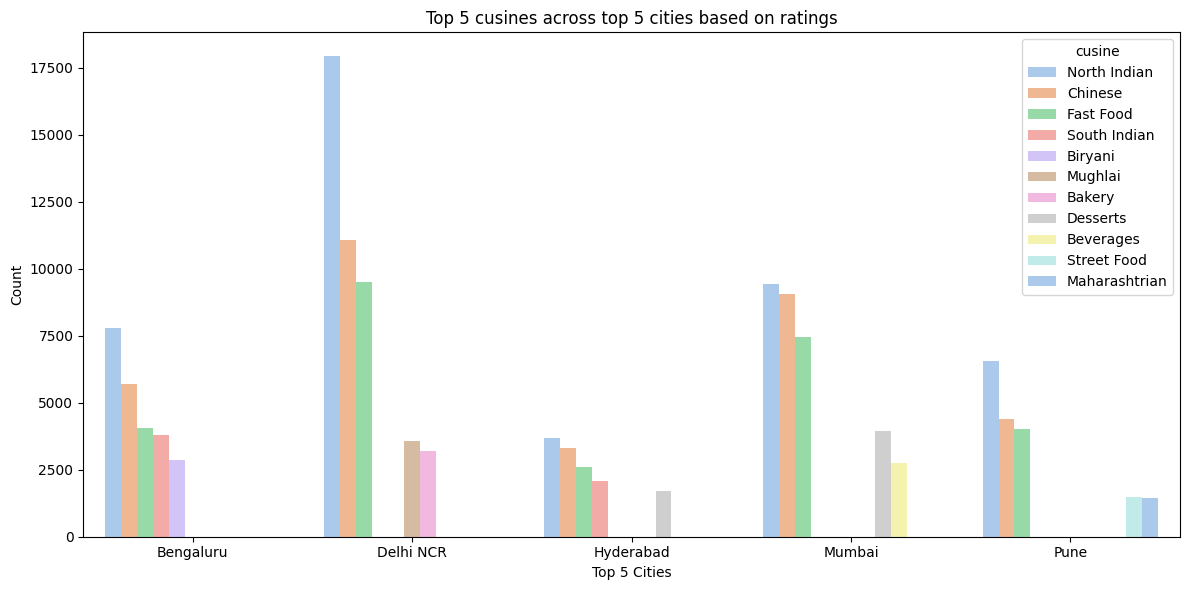

In [34]:
# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=cusine5, x='city', y='count', hue='cusine', palette='pastel')
plt.xlabel('Top 5 Cities')
plt.ylabel('Count')
plt.title("Top 5 cusines across top 5 cities based on ratings")
plt.tight_layout()
plt.show()

## 4️⃣ Price vs Rating Correlation

### 1. Average cost for two of restaurants vs Rating count

In [35]:
# average cost for two of Restaurants
cost_rating_df = df.groupby(['name','rating']).agg({'cost_for_two':'mean', 'rating_count':'max'}).reset_index()
cost_rating_df.head()

,name,rating,cost_for_two,rating_count
0,"""D"" Pizzeria",3.3,500.0,50
1,"""D"" pizzeria",3.6,500.0,68
2,# Desi Patra Poda N More,3.3,150.0,0
3,# Spice Love,3.2,350.0,9
4,# Tag Cafe,0.0,350.0,0


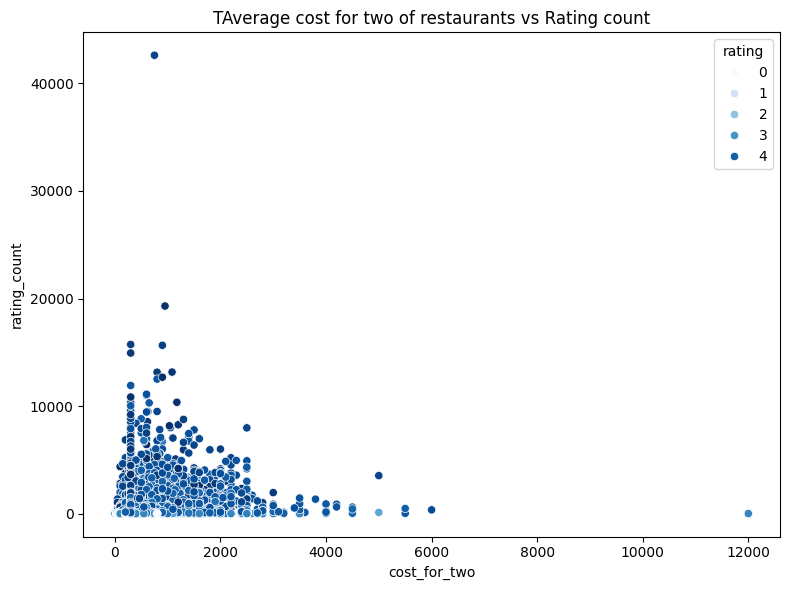

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=cost_rating_df, x='cost_for_two', y='rating_count', hue='rating', palette='Blues')
plt.title("TAverage cost for two of restaurants vs Rating count")
plt.tight_layout()
plt.show()

## 5️⃣ Service Modes Analysis

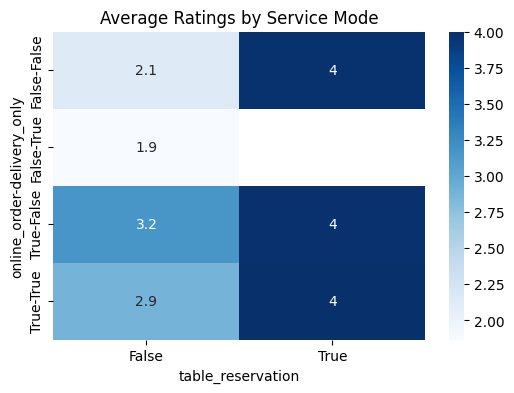

In [37]:
plt.figure(figsize=(6,4))
sns.heatmap(df.groupby(['online_order','delivery_only','table_reservation'])['rating'].mean().unstack(), annot=True, cmap="Blues")
plt.title("Average Ratings by Service Mode")
plt.show()
